## IMPORTS

In [23]:
#standard datascience packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston

## Data Gathering

In [24]:
boston_dataset = load_boston()
boston_dataset #what it looks like

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [25]:
#names of all the valid attributes & base attributes
print(dir(boston_dataset))

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [26]:
#Description of the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data features

In [27]:
#type of the 'data' in boston_dataset
type(boston_dataset.data)

numpy.ndarray

In [28]:
#columns and rows of 'data' in boston_dataset
boston_dataset.data.shape

(506, 13)

In [29]:
#what 'feature_name' looks like
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Data exploration 

In [30]:
#create a pandas dataframe 
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

#add a column of the price(target) to the dataframe
data['PRICE'] = boston_dataset.target

In [31]:
#top rows of the dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
#bottom rows of the dataframe
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [33]:
#number of rows
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Data Cleaning

In [34]:
#check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualization

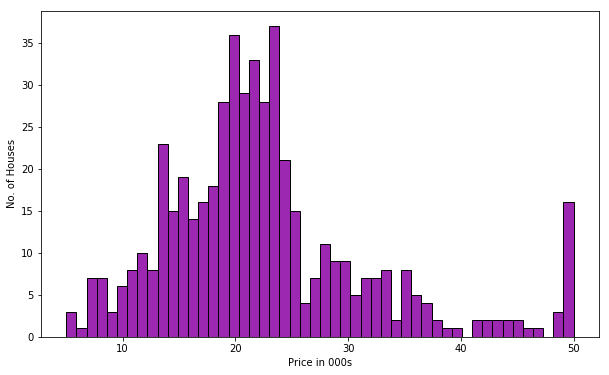

In [35]:
#histogram for prices using plt module
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#9c27b0') 
plt.xlabel('Price in 000s')
plt.ylabel('No. of Houses')
plt.show()

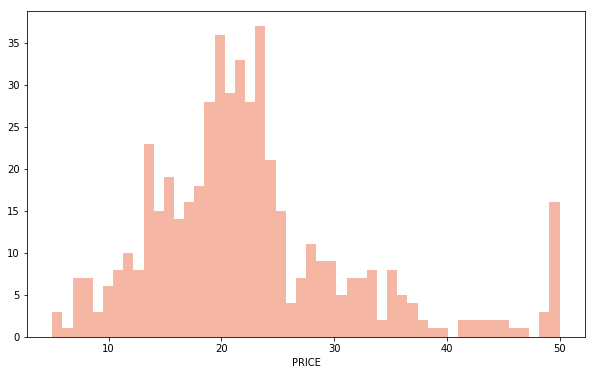

In [36]:
#histogram for price using Seaborn
plt.figure(figsize=(10,6)) 
sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#e64a19') #left w/o probability density function
plt.show()

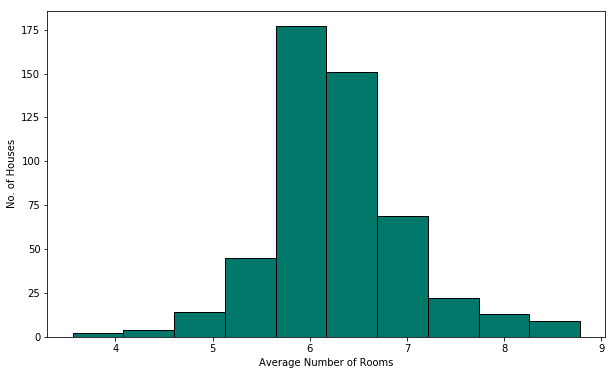

In [37]:
#histogram for the number of rooms, using plt module
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='#00796b') 
plt.xlabel('Average Number of Rooms')
plt.ylabel('No. of Houses')
plt.show()

In [38]:
#Prep for visualizing RAD (index of accessibility to radial highways)
#counts for each particular value
frequency = data['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

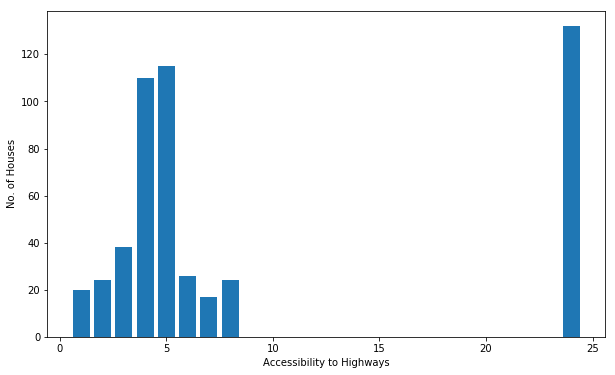

In [39]:
#Bar chart for RAD using plt
plt.figure(figsize=(10,6))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Accessibility to Highways')
plt.ylabel('No. of Houses')
plt.show()

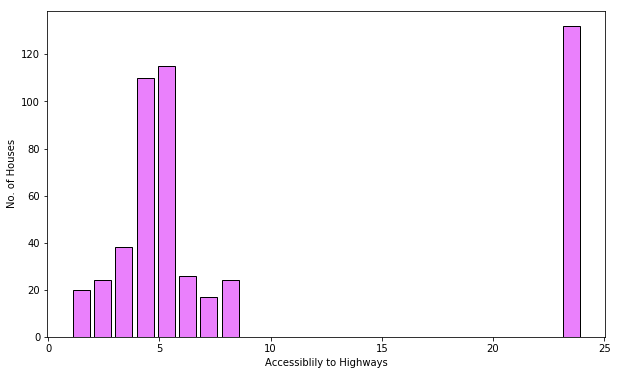

In [40]:
#histogram for RAD using matplotlib
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec = 'black', color='#ea80fc', rwidth=0.8) #for rwidth(width between bars), put a number between 0&1
plt.xlabel('Accessiblily to Highways')
plt.ylabel('No. of Houses')
plt.show()

In [41]:
#how many houses are located on the Charls river? --Dummy variable (0 or 1)
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

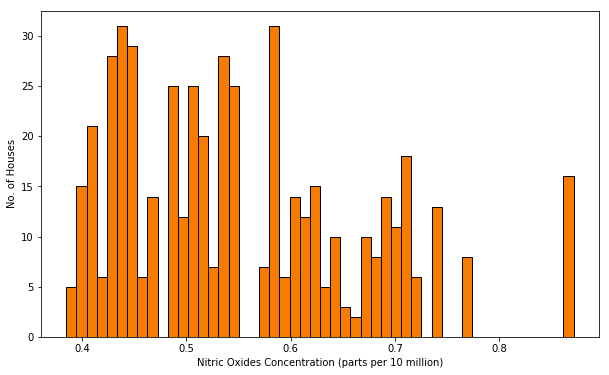

In [42]:
#histogram for NOX(nitric oxides concentration) 
plt.figure(figsize=(10,6))
plt.hist(data['NOX'], bins=50, ec='black', color='#f57c00') 
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('No. of Houses')
plt.show()